## <span style="color:blue">My Model Synopsis </span>

<span style="color:blue">What question am I answering? Conceptual model is below.</span>

Can I outsmart my friends and create my own set of fairly accurate homemade odds using xG that adjusts for the factors I deem as important, to ultimately go beyond breaking even, win some money and my friends' respect? (the latter not so much, but still true)

*I have loved football (The European one not the aussie version, although go Demons!) ever since, and for a few years I've been casually having a competition with my friends in who can predict the most games correct, and get a few bucks with it via bets! My bets have not even been breaking even as of yet, so I was very curious on how I could increase my chances in betting successfully through the use of the famous xG model (expected goals), and adjusting the average xG per team with self-deemed 'important factors', using the popular Poisson Distribution for implied probabilities too. The final creation of homemade odds will then be compared to bookie odds to find some potential value bets. As always though, gamble responsibly!*


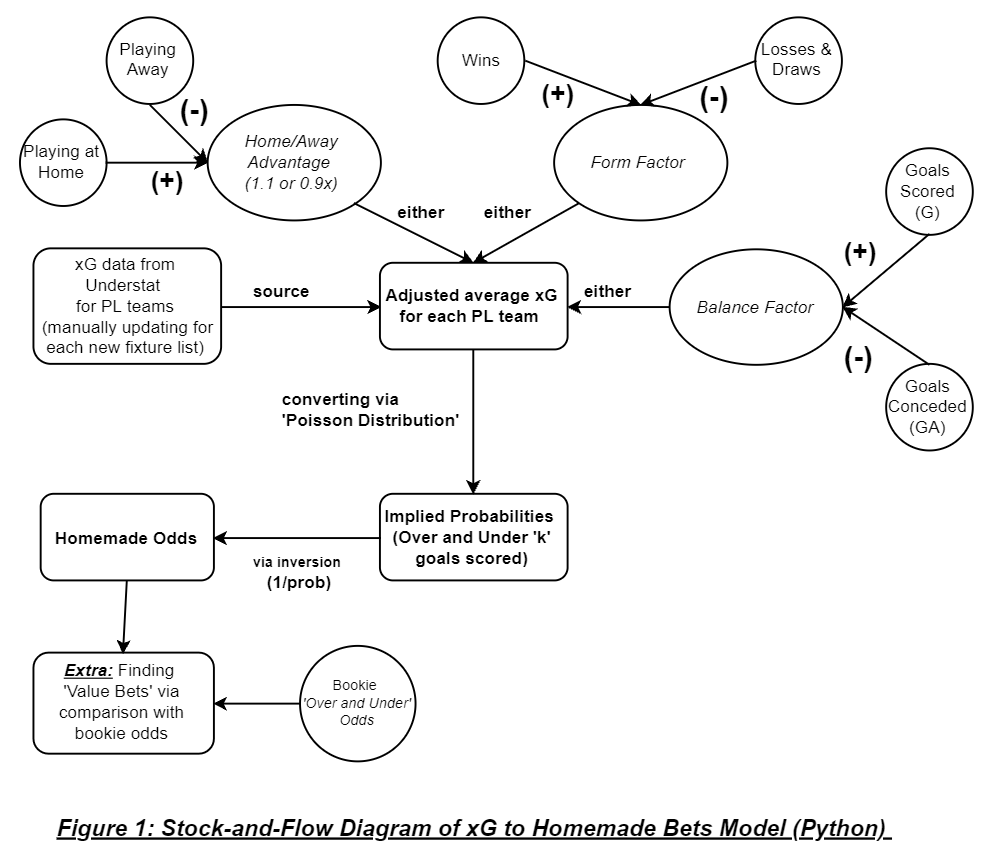

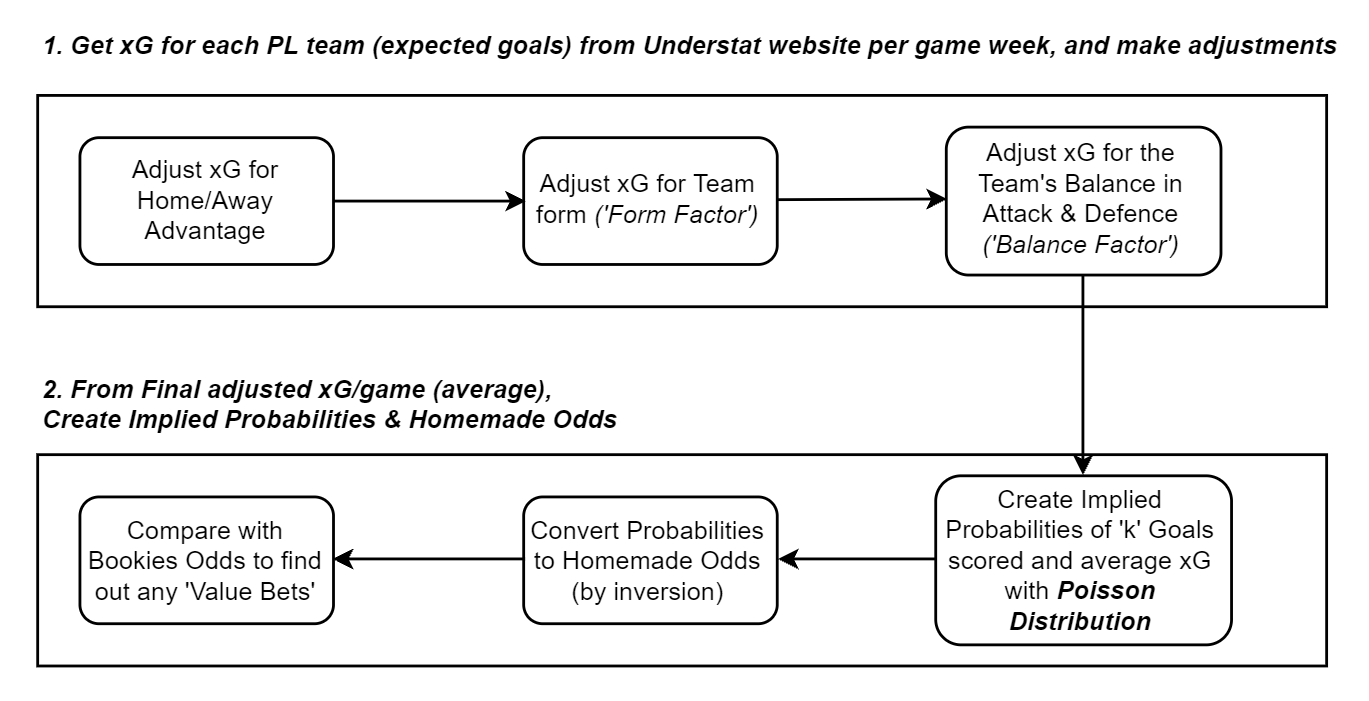


The above diagram is a more step-by-step and rounded approach to this model in comparison to stock-and-flow*

## <span style="color:blue"> Model Breakdown </span>

<span style="color:blue">What mathemathical tools / equations or logical constructs did I use to represent the relationships between the variables depicted by the conceptual model? Identify the external and internal variables, and the boundaries of your model. Explain what type of model you are going to create - i.e. dynamical, discrete and stocastic).</span>

This type of model is Static (no time variable), Deterministic (final odds calculated do not vary), Discrete (xG values are from last 'n' games so can be counted in intervals and averaged).

Although the model itself does not consider space, xG (expected goals) is a more complex model which accounts for the shot selection and 'space' respect to the goal. I am only using the data provided, not making the complex xG model, thankfully!

1. Expected Goals (xG) ~ Mathematical Tools/Data Used
In football, a “shot on target” can't be treated equally as you could take a shot from anywhere with little chance of it going in, or you could score a tap in! xG instead considers the quality of each shot taken by looking at where it was taken, what foot it was taken with and the “style of play”. Thankfully I will not be creating the xG model myself (that would be a pain), but I will be using the data available for each PL team and make some adjustment to increase my chances of winning bets!

2. Boundaries: Only Premier League statistics and fixtures, not for the other "big leagues" as I am not too interested in them and devoutly follow only the PL. Assumes team does not have drastic injuries,deaths or significant changes to the team.

NOTE: Not all variables possible are considered, only those I assume and deem as very important and influential in the results of the teams. This simplifies the model down.

3. Internal variables include: xG values (of each team), 
Home/Away fixture, team form (no. of wins vs matches played), 'Balance Factor' in Attack and Defence of Team (G vs GA)

4. External variables are: Popular bookies' odds 

Equations used: The 'Poisson Distribution', a discrete probability distribution and a popular betting tool used (popular for good reason too!) 

 (Lambda = average value xG over given time, k = number of events e.g. goals scored)

M = matches played so far
W = wins so far
L = losses so far, D = draws so far
G = goals scored by team
GA = goals conceded by team (scored against)

Note that in this case, I have only explored 'over and under' bets as I have not tested this model's wits in calculating the probability of a fixture's outcome. That requires more variables and a more complex model which I may potentially work on in the future. So far the model is working wonders for me!




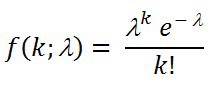

## <span style="color:blue"> My actual model! 'Coding Framework' </span>

<span style="color:blue"> I can definitely improve my commenting and definitions and potentially develop  more useful plots to answer the question originally posed, but here it is so far!</span>

What does the model do exactly in a step-by-step process?
1. I first obtain the average expected goals of every team from the website 'Understat', which has arguably the best xG model freely available
2. The model then adjusts this value when accounting for the variables of the team's form, if it is a home/away fixture and the balance between attack and defence. These are variables/factors I have deemed over my lifetime as a football fan as very influential in a team's ability to score goals. (An assumption, but an important one to simplify the model) 
3. This adjusted average value for expected goals is then converted into implied probabilities via Poisson Distribution and inverted into homemade odds for 'over/under 'k' goals' bets (and potentially wins if you compare two teams' implied probabilities, although not addressed)
4. (additionally) Compare with bookies odds and find 'Value' bets [i.e. if the bookie odd offered is greater than the homemade odd for a specific event]

In terms of results, the implied probabilities produced are still useful in assessing which bets are more likely to happen, but converting them into the format of odds later on in the model makes it easier to compare with standard betting formats. Most of the homemade bets aligned fairly closely with the odds offered by Sportsbet and Bet365, but there were some 'value' bets which I did attempt. So far I have done more than break even (although a relatively small 6 bet sample size) and most have been successful bets to my pleasure. A slight annoyance about the model is that only calculating up to 5 does miss out on ~0.1% of the other events, which could affect the values calculated by a specific marginal error. But What I find helpful about this model is that I can change the extent at which each of the three variables/factors affect the average xG, as my experience and knowledge gets better. It was really fun (and stressful too) making this model and I hope you understand it even with some football jargon and terminologies. Take care!

In [3]:
# start of the model! Reading in xG data which you can easily copy over to excel or download from Understat website 
import pandas as pd
import numpy as np

df = pd.read_csv('xG.csv')

df #rows are in order of the teams' current position on the league table (which will inevitably change over time). It makes sense to me, but if you want to order by xG instead, you will have to adjust for the Home/Away input too, aligning with the teams. 

,Team,M,W,D,L,G,GA,PTS,xG
0,Chelsea,8,6,1,1,16,3,19,13.45
1,Liverpool,8,5,3,0,22,6,18,20.54
2,Manchester City,8,5,2,1,16,3,17,17.89
3,Brighton,8,4,3,1,8,5,15,8.87
4,Manchester United,8,4,2,2,16,10,14,13.52
5,Everton,7,4,2,1,13,8,14,11.94
6,Brentford,8,3,3,2,10,7,12,12.65
7,Wolverhampton Wanderers,8,4,0,4,8,8,12,12.48
8,Tottenham,7,4,0,3,6,10,12,7.25
9,West Ham,7,3,2,2,14,10,11,12.50


In [4]:
# update index to reflect table position
df.index = range(1,len(df)+1)

#df = df.drop(columns=['xG_adjusted'])

# Where a team plays either home or away for me has a significant impact on the team's performance. If you have supporters on your back filling the stadium then that has a huge impact on the team:
next_fixture_homeoraway = ['H', 'A', 'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'A', 'H'] #this is currently adjusted manually, but can be automated from a website if coding is more proficient.

# Note, there always will be 10 Home Games and 10 Away Games as in one fixture there are two teams, one home and one away.
df['Next Fixture, Home/Away'] = next_fixture_homeoraway

xG = df['xG']
matches_played = df['M']
xG_average = xG/matches_played
df['xG_average'] = xG_average

# The difference between goals scored and goals conceded (gA) is a great indicator of the balance between attack and defence, which is likely to win teams games!

# Home/away — I assume that teams who are playing at home are expected to score 10% more goals on average, whilst teams who are playing away will score 5% less on average. These variables are subject to change"
home_advantage = 1.1
away_advantage = 0.95

av_xG_adjusted = xG_average

for i in range(1, len(df)+1):
  if df.at[i,'Next Fixture, Home/Away'] == 'H': # team is playing home next fixture
    av_xG_adjusted[i] = av_xG_adjusted[i]*home_advantage

  else: 
      av_xG_adjusted[i] = av_xG_adjusted[i]*away_advantage

df['av_xG_adjusted'] = av_xG_adjusted


# The second variable I will consider is what I call the 'balance factor' of the team, which calculates difference between goals scored (G) and goals conceded (gA) and then divides it by the number of games played. 
# This reflects the number of goals scored without a response from the other team (a.k.a until another goal conceded). The higher, the stronger the team is and more likely they are to win. I add this value to 100%, and then multiply it to av_xG_adjusted for more accurate reflection.

netGoalspergame = (df['G'] - df['GA'])/matches_played
balancefactor = (netGoalspergame + 100)/100 # getting decimal equivalent of % balance factor

av_xG_adjusted_balance = av_xG_adjusted
for i in range(1, len(df)+1):
  av_xG_adjusted_balance[i] = av_xG_adjusted_balance[i]*balancefactor[i]

df['av_xG_adjusted_balance'] = av_xG_adjusted_balance
df


# Accounting for 'form factor'. Essentially what is the proportion of wins to total number of games currently. The greater it is, the more likely the team will go out to score goals and win instead of playing for draws.
# The maximum increase or decrease in xG is by 1.05 if they win all their games, such that the model is controlled and this factor does not alter values in insane values
# Note I did not consider the league table position, as these can change a lot if a certain team plays earlier than another and wins. I would like this model to be reflective of a per game basis instead of a live table indicator

prop_of_games_won = (df['W']/df['M'])

form_factor = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #form factor for each team from 1st to 20th in order of left to right

for i in range(1, len(df)+1):
  if prop_of_games_won[i] >= 0.5: # i.e. if the team has won more games than lost
    form_factor[i-1] = (100 + 10*(prop_of_games_won[i] - 0.5))/100
  else: 
      form_factor[i-1] = (100 - 10*(0.5-prop_of_games_won[i]))/100

form_factor

av_xG_adjusted_balance_form = av_xG_adjusted_balance*(form_factor)
av_xG_adjusted_balance_form

df['final_av_xG'] = av_xG_adjusted_balance_form
df

#The last column is the final dataframe before calculating probabilities and comparing to odds!

avG = df['final_av_xG'] # this is the indicator I will use that reflects the average amount of goals scored and to be scored in the future when accoutning past xG values and the three variables.
                        # of course this is updated continuously when more games are played and the xG values are updated, albeit manually right now. Maybe I'll find a way to import xG values from understat automatically :)

df


,Team,M,W,D,L,G,GA,PTS,xG,"Next Fixture, Home/Away",xG_average,av_xG_adjusted,av_xG_adjusted_balance,final_av_xG
1,Chelsea,8,6,1,1,16,3,19,13.45,H,1.681250,1.849375,1.879427,1.926413
2,Liverpool,8,5,3,0,22,6,18,20.54,A,2.567500,2.439125,2.487907,2.519006
3,Manchester City,8,5,2,1,16,3,17,17.89,A,2.236250,2.124437,2.158960,2.185947
4,Brighton,8,4,3,1,8,5,15,8.87,H,1.108750,1.219625,1.224199,1.224199
5,Manchester United,8,4,2,2,16,10,14,13.52,H,1.690000,1.859000,1.872943,1.872943
6,Everton,7,4,2,1,13,8,14,11.94,A,1.705714,1.620429,1.632003,1.643660
7,Brentford,8,3,3,2,10,7,12,12.65,A,1.581250,1.502188,1.507821,1.488973
8,Wolverhampton Wanderers,8,4,0,4,8,8,12,12.48,H,1.560000,1.716000,1.716000,1.716000
9,Tottenham,7,4,0,3,6,10,12,7.25,H,1.035714,1.139286,1.132776,1.140867
10,West Ham,7,3,2,2,14,10,11,12.50,A,1.785714,1.696429,1.706122,1.693936


Note that the average number of goals scored in a football (soccer as us Aussies say it) is ~2.6. So I'm taking 2 above and below and calculating the implied probabilities (from the adjusted average xG formed) of 0 to 5 goals scored using the Poisson Distribution.

In [5]:
# Poisson Distribution (up until k = 6 goals, because let's be real. Football is a relatively low scoring game, and I don't expect any team to score more than 6 goals in a game)
import math 

#df_Poisson = pd.read_csv('PoissonDistributionavG.csv')
data = {'Team': ['Chelsea', 'Liverpool', 'Manchester City', 'Brighton', 'Manchester United', 'Everton', 'Brentford', 'Wolverhampton Wanderers', 'Tottenham', 'West Ham', 'Leicester', 'Aston Villa', 'Arsenal', 'Crystal Palace', 'Southampton', 'Watford', 'Leeds', 'Newcastle United', 'Burnley', 'Norwich']}
df_Poisson = pd.DataFrame(data)

df_Poisson.index = range(1,len(df)+1) 

largest_goals_scored = 6 
 
for goals_scored in range(largest_goals_scored): #from 0 to 5 goals 
    for i in range(1,len(df)+1):
      df_Poisson.at[i, goals_scored] = ((math.exp(-avG[i]) * math.pow(avG[i], goals_scored)) / math.factorial(goals_scored))

df_Poisson # this produces a homemade % chance of each team scoring X goals in the next fixture. For example

,Team,0,1,2,3,4,5
1,Chelsea,0.145670,0.280620,0.270295,0.173567,0.083590,0.032206
2,Liverpool,0.080540,0.202880,0.255528,0.214559,0.135119,0.068073
3,Manchester City,0.112371,0.245638,0.268475,0.195624,0.106906,0.046738
4,Brighton,0.293993,0.359906,0.220298,0.089896,0.027513,0.006736
5,Manchester United,0.153671,0.287817,0.269532,0.168273,0.078791,0.029514
6,Everton,0.193271,0.317672,0.261073,0.143038,0.058777,0.019322
7,Brentford,0.225604,0.335919,0.250087,0.124124,0.046204,0.013759
8,Wolverhampton Wanderers,0.179784,0.308509,0.264701,0.151409,0.064954,0.022292
9,Tottenham,0.319542,0.364555,0.207954,0.079083,0.022556,0.005147
10,West Ham,0.183795,0.311336,0.263692,0.148892,0.063054,0.021362


Now that we have the self-adjusted probabilities of each team scoring specific goals. Then we can use these in comparison with odds!

My betting strategy currently focuses on “over and under” bets, which are concerned with teams scoring over x or under y amount of goals. E.g. I bet that Chelsea will score over two goals against Southampton.

Bet365 and other bookies have public over and under odds to compare with! Gamble responsibly as always, or don't if you are not well prepared or ready to bear the risks.


In [6]:

#In order to work out the probabilities of these events, I take the sum of probabilities for a team scoring that many goals or more.
# For example, for “over 2.5” goals I would add the sum of probabilities of 3,4 and 5 goals scored (as all probabilities add up to 1, and in this case from 1 to 5 it adds up to ~0.99, almost all the probability without accounting for infinitely many goals)

teams = {'Team': ['Chelsea', 'Liverpool', 'Manchester City', 'Brighton', 'Manchester United', 'Everton', 'Brentford', 'Wolverhampton Wanderers', 'Tottenham', 'West Ham', 'Leicester', 'Aston Villa', 'Arsenal', 'Crystal Palace', 'Southampton', 'Watford', 'Leeds', 'Newcastle United', 'Burnley', 'Norwich']}
df_prob_implied_over = pd.DataFrame(teams)
df_homemade_over_odds = pd.DataFrame(teams)

df_prob_implied_over.index = range(1,len(df)+1) # changing index to start from 1
df_homemade_over_odds.index = range(1,len(df)+1)

prob_over_0_goals = []
prob_over_1_goals = []
prob_over_2_goals = []
prob_over_3_goals = []
prob_over_4_goals = []

odds_over_0_goals = []
odds_over_1_goals = []
odds_over_2_goals = []
odds_over_3_goals = []
odds_over_4_goals = []

for i in range(1,21): #prob over 0 goals
  prob_implied_0 = df_Poisson.at[i,1] + df_Poisson.at[i,2] + df_Poisson.at[i,3] + df_Poisson.at[i,4] + df_Poisson.at[i,5]
  prob_over_0_goals.append(prob_implied_0)
  odds_over_0_goals.append(1/prob_implied_0)
  
df_prob_implied_over['over_0'] = prob_over_0_goals
df_homemade_over_odds['over_0'] = odds_over_0_goals

for i in range(1,21): #prob over 1 goal
  prob_implied_1 = df_Poisson.at[i,2] + df_Poisson.at[i,3] + df_Poisson.at[i,4] + df_Poisson.at[i,5] 
  prob_over_1_goals.append(prob_implied_1)
  odds_over_1_goals.append(1/prob_implied_1)

df_prob_implied_over['over_1'] = prob_over_1_goals
df_homemade_over_odds['over_1'] = odds_over_1_goals

for i in range(1,21): #prob over 2 goals
  prob_implied_2 = df_Poisson.at[i,3] + df_Poisson.at[i,4] + df_Poisson.at[i,5] 
  prob_over_2_goals.append(prob_implied_2)
  odds_over_2_goals.append(1/prob_implied_2)

df_prob_implied_over['over_2'] = prob_over_2_goals
df_homemade_over_odds['over_2'] = odds_over_2_goals

for i in range(1,21): #prob over 3 goals
  prob_implied_3 = df_Poisson.at[i,4] + df_Poisson.at[i,5] 
  prob_over_3_goals.append(prob_implied_3)
  odds_over_3_goals.append(1/prob_implied_3)

df_prob_implied_over['over_3'] = prob_over_3_goals
df_homemade_over_odds['over_3'] = odds_over_3_goals

for i in range(1,21): #prob over 4 goals
  prob_implied_4 = df_Poisson.at[i,5] 
  prob_over_4_goals.append(prob_implied_4)
  odds_over_4_goals.append(1/prob_implied_4)

df_prob_implied_over['over_4'] = prob_over_4_goals
df_homemade_over_odds['over_4'] = odds_over_4_goals

df_prob_implied_over #display implied probabilities of over 'k' goals (between 0 and 4) scored in next fixture for the team


,Team,over_0,over_1,over_2,over_3,over_4
1,Chelsea,0.840278,0.559658,0.289363,0.115796,0.032206
2,Liverpool,0.876158,0.673278,0.417750,0.203192,0.068073
3,Manchester City,0.863382,0.617744,0.349269,0.153644,0.046738
4,Brighton,0.704350,0.344443,0.124145,0.034249,0.006736
5,Manchester United,0.833927,0.546110,0.276578,0.108306,0.029514
6,Everton,0.799882,0.482209,0.221137,0.078098,0.019322
7,Brentford,0.770093,0.434175,0.184088,0.059964,0.013759
8,Wolverhampton Wanderers,0.811865,0.503356,0.238656,0.087247,0.022292
9,Tottenham,0.679294,0.314739,0.106785,0.027702,0.005147
10,West Ham,0.808336,0.497000,0.233308,0.084415,0.021362


Odds are simply the inverse of implied probabilities, so inverting this number provides me with my very own homemade odds for “overs and unders” bets, that can be compared to standard bookie odds to find potential 'value bets'/opportunities to earn some extra cash!


In [7]:
#In order to work out the probabilities of these events, I take the sum of probabilities for a team scoring under 'k' goals
# For example, for “under 2.5” goals I would add the sum of probabilities of 0 or 1 goals scored 

teams = {'Team': ['Chelsea', 'Liverpool', 'Manchester City', 'Brighton', 'Manchester United', 'Everton', 'Brentford', 'Wolverhampton Wanderers', 'Tottenham', 'West Ham', 'Leicester', 'Aston Villa', 'Arsenal', 'Crystal Palace', 'Southampton', 'Watford', 'Leeds', 'Newcastle United', 'Burnley', 'Norwich']}
df_prob_implied_under = pd.DataFrame(teams)
df_homemade_under_odds = pd.DataFrame(teams)

df_prob_implied_under.index = range(1,len(df)+1) # changing index to start from 1
df_homemade_under_odds.index = range(1,len(df)+1)

prob_under_1_goals = []
prob_under_2_goals = []
prob_under_3_goals = []
prob_under_4_goals = []
prob_under_5_goals = []

odds_under_1_goals = []
odds_under_2_goals = []
odds_under_3_goals = []
odds_under_4_goals = []
odds_under_5_goals = []


for i in range(1,21): #prob under 1 goal
  prob_implied_u1 = df_Poisson.at[i,0] 
  prob_under_1_goals.append(prob_implied_u1)
  odds_under_1_goals.append(1/prob_implied_u1)

df_prob_implied_under['under_1'] = prob_under_1_goals
df_homemade_under_odds['under_1'] = odds_under_1_goals

for i in range(1,21): #prob under 2 goal
  prob_implied_u2 = df_Poisson.at[i,0] + df_Poisson.at[i,1]
  prob_under_2_goals.append(prob_implied_u2)
  odds_under_2_goals.append(1/prob_implied_u2)

df_prob_implied_under['under_2'] = prob_under_2_goals
df_homemade_under_odds['under_2'] = odds_under_2_goals

for i in range(1,21): #prob under 3 goal
  prob_implied_u3 = df_Poisson.at[i,0] + df_Poisson.at[i,1] + df_Poisson.at[i,2]
  prob_under_3_goals.append(prob_implied_u3)
  odds_under_3_goals.append(1/prob_implied_u3)

df_prob_implied_under['under_3'] = prob_under_3_goals
df_homemade_under_odds['under_3'] = odds_under_3_goals

for i in range(1,21): #prob under 4 goal
  prob_implied_u4 = df_Poisson.at[i,0] + df_Poisson.at[i,1] + df_Poisson.at[i,2] + df_Poisson.at[i,3]
  prob_under_4_goals.append(prob_implied_u4)
  odds_under_4_goals.append(1/prob_implied_u4)

df_prob_implied_under['under_4'] = prob_under_4_goals
df_homemade_under_odds['under_4'] = odds_under_4_goals

for i in range(1,21): #prob under 5 goals
  prob_implied_u5 = df_Poisson.at[i,0] + df_Poisson.at[i,1] + df_Poisson.at[i,2] + df_Poisson.at[i,3] + df_Poisson.at[i,4]
  prob_under_5_goals.append(prob_implied_u5)
  odds_under_5_goals.append(1/prob_implied_u5)

df_prob_implied_under['under_5'] = prob_under_5_goals
df_homemade_under_odds['under_5'] = odds_under_5_goals

df_prob_implied_under


,Team,under_1,under_2,under_3,under_4,under_5
1,Chelsea,0.145670,0.426290,0.696585,0.870152,0.953742
2,Liverpool,0.080540,0.283419,0.538947,0.753506,0.888624
3,Manchester City,0.112371,0.358009,0.626484,0.822109,0.929015
4,Brighton,0.293993,0.653899,0.874198,0.964094,0.991607
5,Manchester United,0.153671,0.441487,0.711019,0.879292,0.958083
6,Everton,0.193271,0.510944,0.772016,0.915055,0.973831
7,Brentford,0.225604,0.561523,0.811610,0.935734,0.981938
8,Wolverhampton Wanderers,0.179784,0.488293,0.752994,0.904403,0.969357
9,Tottenham,0.319542,0.684097,0.892051,0.971134,0.993689
10,West Ham,0.183795,0.495131,0.758823,0.907716,0.970769


In [8]:

df_homemade_over_odds # let's go! But how is this useful? We can scour different bookie websites' 'over and under' odds for any 'value' bets (i.e. a greater odd than my homemade odd for specific bet)
#df_homemade_under_odds  ### just remove the # in front of df... if you would like to see the homemade under odds as it only displays the latest one


,Team,over_0,over_1,over_2,over_3,over_4
1,Chelsea,1.190082,1.786805,3.455868,8.635864,31.050226
2,Liverpool,1.141347,1.485271,2.393775,4.921464,14.690125
3,Manchester City,1.158236,1.618793,2.863126,6.508540,21.395776
4,Brighton,1.419750,2.903234,8.055084,29.197993,148.451489
5,Manchester United,1.199146,1.831132,3.615614,9.233138,33.881889
6,Everton,1.250185,2.073788,4.522091,12.804370,51.755151
7,Brentford,1.298544,2.303219,5.432185,16.676726,72.677495
8,Wolverhampton Wanderers,1.231731,1.986664,4.190138,11.461745,44.858439
9,Tottenham,1.472117,3.177234,9.364612,36.098071,194.302659
10,West Ham,1.237109,2.012074,4.286185,11.846194,46.812672


18


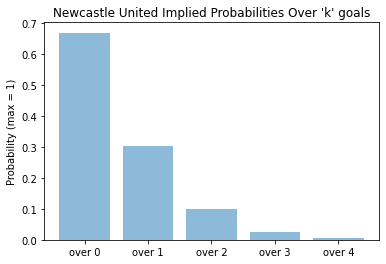

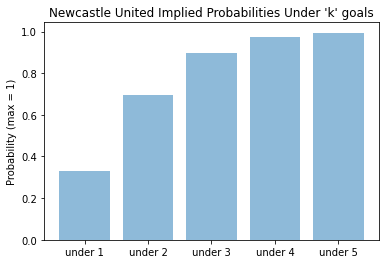

In [11]:
#Visualising the Implied Probabilities of Over and Under Homemade Bets of a specific PL Team

import matplotlib.pyplot as plt

Team = 'Newcastle United' # change this to find probabilities for other specific teams. e.g. 'Chelsea' will show up implied probs for Chelsea 
index = df_prob_implied_over[df_prob_implied_over['Team']== Team].index.values
index = index[0]
print(index)

df_prob_only_over = df_prob_implied_over.loc[:,'over_0':'over_4'] #removing the column of team names to then extract only the data to plot
df_prob_only_under = df_prob_implied_under.loc[:,'under_1':'under_5']

over = ('over 0', 'over 1', 'over 2', 'over 3', 'over 4')
y_pos_over = np.arange(len(over))

under = ('under 1', 'under 2', 'under 3', 'under 4', 'under 5')
y_pos_under = np.arange(len(under))

probability_over = df_prob_only_over.loc[index,:]   
probability_under = df_prob_only_under.loc[index,:]

#plotting implied probabilities of OVER 'k' goals scored by 'x' team:
plt.bar(y_pos_over, probability_over, align='center', alpha=0.5)
plt.xticks(y_pos_over, over)
plt.ylabel('Probability (max = 1)')
plt.title("{} Implied Probabilities Over 'k' goals".format(Team)) #plugs in name of team of interest

plt.show()

#plotting implied probabilities of UNDER 'k' goals scored by 'x' team:
plt.bar(y_pos_under, probability_under, align='center', alpha=0.5)
plt.xticks(y_pos_under, under)
plt.ylabel('Probability (max = 1)')
plt.title("{} Implied Probabilities Under 'k' goals".format(Team)) #plugs in name of team of interest

plt.show()


In order to find “value” bets (where I believe a bookmaker has predicted an outcome to be more unlikely than I believe it to be) I need to find the difference between the bookies odds and my homemade odds)

This could be automated even more but this has not been exposed to me yet, so this is where my xG conversion to implied probabilities to homemade odds and finally to finding potential opportunities of value' bets model stops! :) 

Note: Common over and under odds offered are for over 2.5 or under 2.5 goals, which is the exact same as over 2 goals and under 2 goals respectively* Hope this model showed my passion and efforts in making a reasonable betting model (still not too complex). Cheers!

The following code creates a compressed file with all the files in the folder in which you are currently working.

In [1]:
!tar chvfz PythonBettingOddsModelSam2021_model.tar.gz *

poisson.jpeg
Python_Football_Betting_Odds_xG_FINAL-Copy1.ipynb
step by step model diagram python betting clean.PNG
stock and flow diagram python betting model.PNG
xG data template.csv
